## Insurance Premium Prediction

#### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Data Checks to perform
- Exploratory data analysis
- Data Pre-Processing
- Model Training
- Choose best model

### 1) Problem statement
- The goal of this project is to give people an estimate of how much they need based on their individual health situation. After that, customers can work with any health insurance carrier and its plans and perks while keeping the projected cost from our study in mind. This can assist a person in concentrating on the health side of an insurance policy rather han the ineffective part.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/noordeen/insurance-premium-prediction
- The data consists of 7 column and 1339 rows.

### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('insurance.csv')

#### Creating a DataFrame object

In [3]:
df = pd.DataFrame(df,columns = ['age','sex','bmi','children','smoker','region','expenses'])

#### Show Top 5 Records

In [4]:
df.head(5)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


#### Shape of the dataset

In [5]:
df.shape

(1338, 7)

### 2.2 Dataset information

- Age : Age of an Individual
- sex : sex of an Individual  -> (Male/female)
- bmi : Body Mass Index
- children : Number of children Individual have i.e. No. of dependants
- smoker : person is a smoker or not -> (yes/no) 
- region : southeast, southwest, northeast, northwest
- expenses : Medical Expenses i.e. Premium amount

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

### 3.1 Check Missing values

In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

#### There are no missing values in the data set

### 3.2 Check Duplicates

In [7]:
df.duplicated().sum()

1

In [8]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


#### There is 1 duplicate  values in the data set at 581 index

#### Dropping duplicates

In [9]:
df = df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.shape

(1337, 7)

#### There are no duplicate values in the dataset anymore.

### 3.3 Check data types

In [12]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### 3.4 Checking the number of unique values of each column

In [13]:
df.nunique()

age           47
sex            2
bmi          275
children       6
smoker         2
region         4
expenses    1337
dtype: int64

### 3.5 Check statistics of dataset

In [14]:
df.describe()

,age,bmi,children,expenses
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.665520,1.095737,13279.121638
std,14.044333,6.100664,1.205571,12110.359657
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4746.340000
50%,39.000000,30.400000,1.000000,9386.160000
75%,51.000000,34.700000,2.000000,16657.720000
max,64.000000,53.100000,5.000000,63770.430000


#### Insight

- From above description of numerical data there is a huge difference between Min and Max values of datsets specially expenses feature.

### 3.6 Exploring Categorical and Numerical Features in Dataset

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [16]:
print("Categories in 'sex' variable:",end=" " )
print(df['sex'].unique())

print("Categories in 'smoker' variable:  ",end=" ")
print(df['smoker'].unique())

print("Categories in'region' variable:",end=" " )
print(df['region'].unique())

print("Categories in 'children' variable: ",end=" " )
print(df['children'].unique())

Categories in 'sex' variable: ['female' 'male']
Categories in 'smoker' variable:   ['yes' 'no']
Categories in'region' variable: ['southwest' 'southeast' 'northwest' 'northeast']
Categories in 'children' variable:  [0 1 3 2 5 4]


In [17]:
# define numerical columns
numeric_features = []
for feature in df.columns:
    if df[feature].dtype != 'O':
        numeric_features.append(feature)
print('we have {} numerical features in our dataset: {}'.format(len(numeric_features),numeric_features))

# define categorical columns
categorical_features = []
for feature in df.columns:
    if df[feature].dtype == 'O':
        categorical_features.append(feature)
print('we have {} categorical features in our dataset: {}'.format(len(categorical_features),categorical_features))


we have 4 numerical features in our dataset: ['age', 'bmi', 'children', 'expenses']
we have 3 categorical features in our dataset: ['sex', 'smoker', 'region']


### 4. Exploratory Data Analysis
#### 4.1 Visualize data distribution to make some conclusion. 
- countplot
- Heatmap
- pairplot

#### countplot

<AxesSubplot:xlabel='smoker', ylabel='count'>

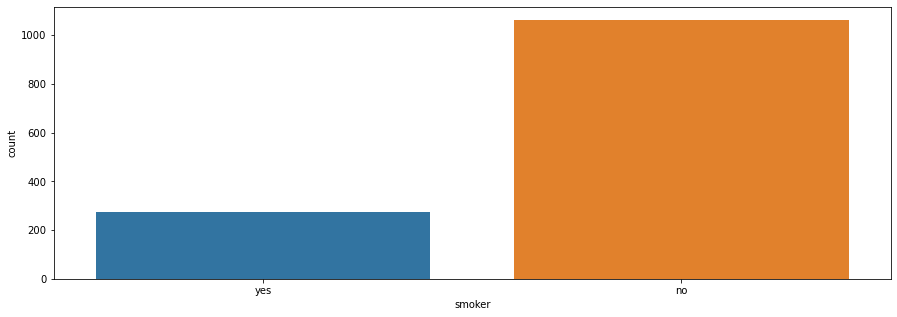

In [ ]:
plt.figure(figsize =(15,5))
sns.countplot(df['smoker'])

<AxesSubplot:xlabel='region', ylabel='count'>

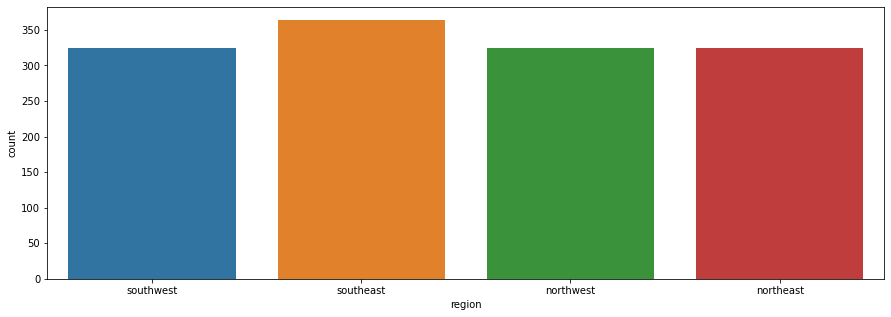

In [ ]:
plt.figure(figsize =(15,5))
sns.countplot(df['region'])

#### Pairplot

<Figure size 1500x500 with 0 Axes>

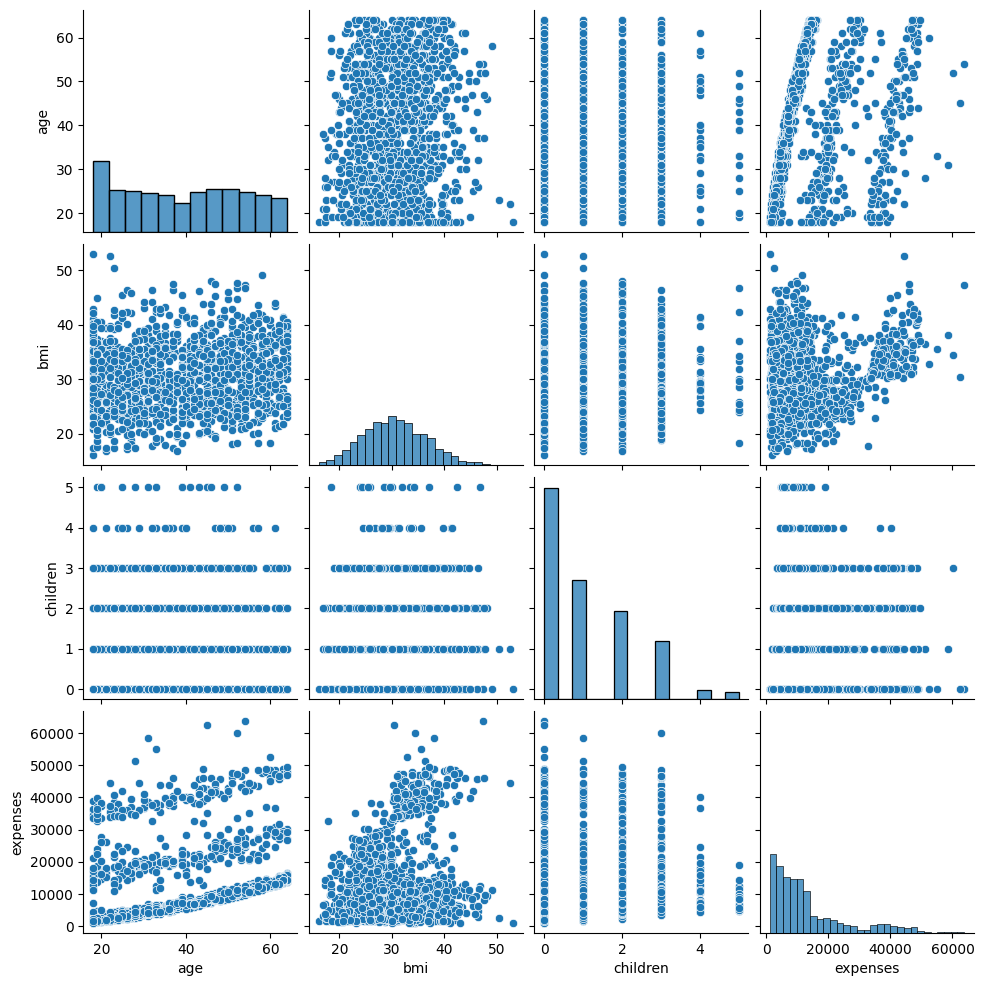

In [23]:
plt.figure(figsize =(15,5))
sns.pairplot(df)

#### Heatmap
##### Lets see the correlation between features using correlation coefficient and Heatmap

In [29]:
df.corr(numeric_only = True)

,age,bmi,children,expenses
age,1.000000,0.109414,0.041536,0.298308
bmi,0.109414,1.000000,0.012641,0.198637
children,0.041536,0.012641,1.000000,0.067389
expenses,0.298308,0.198637,0.067389,1.000000


<AxesSubplot:>

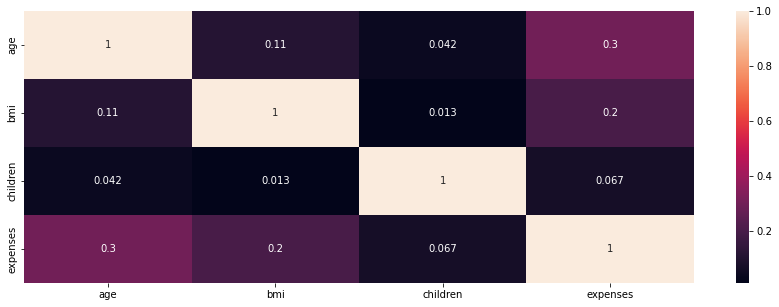

In [ ]:
plt.figure(figsize =(15,5))
sns.heatmap(data=df.corr(), annot = True)

##### from this Heatmap we can analyse that expenses is 30% correlated to age and 20% correlated to bmi whereas it is very less correlated to no. of children 

### Visulaization of Numerical Features with Target Feature

#### No. of children vs Expenses

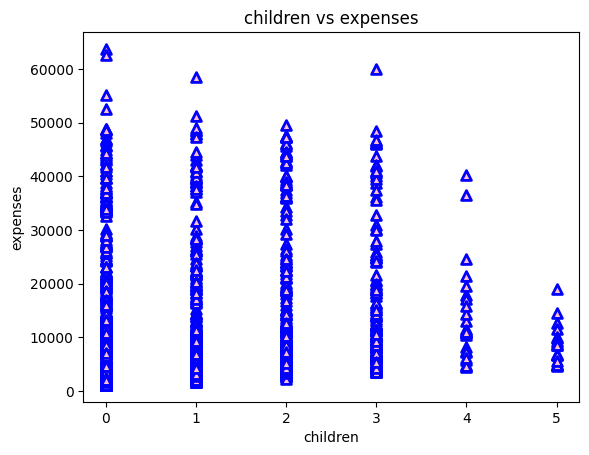

In [30]:
plt.scatter(df['children'], df['expenses'], c ="pink",
            linewidths = 2,
            marker ="^",
            edgecolor ="Blue",
            s = 50)
 

plt.xlabel("children")
plt.ylabel("expenses")
plt.title("children vs expenses")
plt.show()

##### From the above plot we can observe that even if there are no children, expenses seems to be high. may be they are smokers or they have major illnesses or diseases.

#### Age vs Expenses

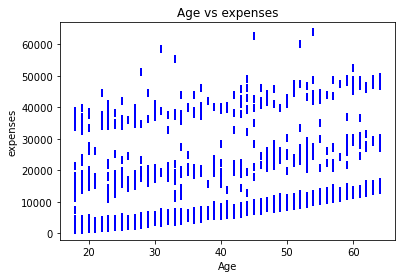

In [26]:
plt.scatter(df['age'], df['expenses'], c ="blue",
            linewidths = 2,
            marker ="|",
            edgecolor ="green",
            s = 50)
 

plt.xlabel("Age")
plt.ylabel("expenses")
plt.title("Age vs expenses")
plt.show()

##### The general trend seems to be that medical expenses increase with age, as we might expect.However, there is significant variation at every age , and its clear that age alone cannot be used to accurately determine medical expenses.

<AxesSubplot:xlabel='age', ylabel='expenses'>

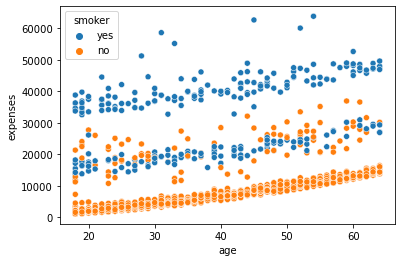

In [27]:
sns.scatterplot(data=df, x="age", y="expenses", hue="smoker")

##### we can see three "clusters" of points, each of which seems to form a line with an increasing slope:
- The First and the largest cluster consists of primary of presumbaly "Healthy Non-Smokers" who have relatively Low Medical Expenses compared to others.
- The Second cluster contains a mix of Smokers and Non-Smokers. It's possible that these are actually two distinct but overlapping clusters: "Non-Smokers with medical issues" and  "Smokers without major medical issues".
- The final cluster consists exclusively of smokers, presumbaly smokers with major medical issues that are possibly related to or worsened by smoking.

#### BMI vs Expenses

<AxesSubplot:xlabel='bmi', ylabel='expenses'>

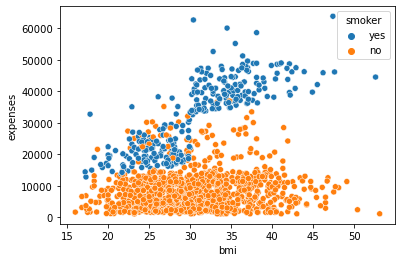

In [28]:
sns.scatterplot(data=df, x="bmi", y="expenses", hue="smoker")

##### It appears that for non-smokers, an increase in BMI doesn't seem to be related to an increase in medical expenses. However, medical expenses seem to be significantly higher for smokers with a BMI greater than 30.

### Visulaization of Categorical Features with Target Feature

#### Sex vs Expenses

<AxesSubplot:xlabel='sex', ylabel='expenses'>

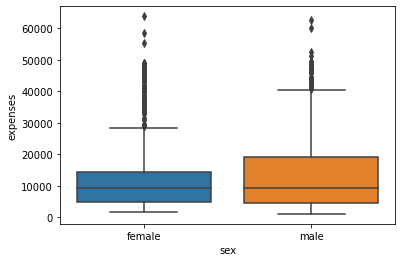

In [29]:
sns.boxplot(x = 'sex', y = 'expenses', data = df)

##### From this boxplot, although median looks quite same, 75% of female expenses is less than male

#### Smoker vs Expenses

<AxesSubplot:xlabel='smoker', ylabel='expenses'>

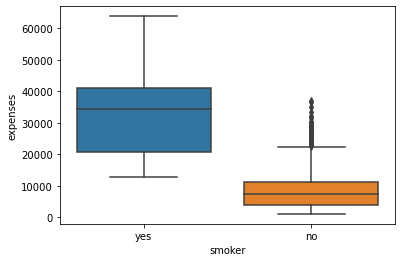

In [30]:
sns.boxplot(x='smoker', y = 'expenses', data = df)

##### From this boxplot, a person who smokes tend to pay more premium than non-smoker

#### region vs expenses

<AxesSubplot:xlabel='region', ylabel='expenses'>

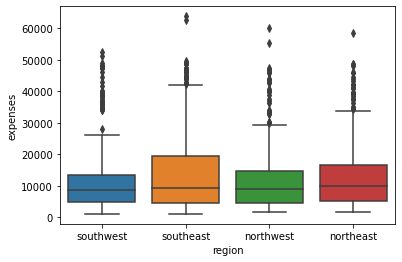

In [31]:
sns.boxplot(x = 'region', y = 'expenses', data = df)

##### There is not much difference in the median of all region's expenses.

### Distribution of each feature

#### Expenses

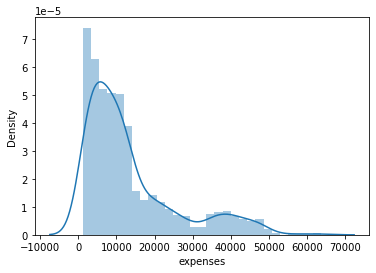

In [32]:
sns.distplot(df['expenses'])
plt.show()

##### For most customers medical expenses are under 10k.only a small fraction of customers have high medical expenses.
 - As per the rule if the skewness is between (-0.5 and 0.5), data is fairly symmetrical.If the skewness is between (-1 and     -0.5) or between (0.5 and 1), data is moderstely skewed. If the skewness is (less than -1 or greater 1), data is highly skewed.   

In [33]:
print('skewness:',df['expenses'].skew())

skewness: 1.5153909165486397


##### We can say that, expenses data is :
- Highly skewed
- Right skewed i.e it has positive skewness
- deviated from Normal Distribution, so we need to normalize the data using Normalizing techniques (scaling, log sacling, z-score)

In [34]:
print('Kurtosis:',df['expenses'].kurt())

Kurtosis: 1.6042206910401187


##### Positive Kurtosis indicates a "heavy-tailed" distribution and Negative Kurtosis indicates a "Light-tailed" distribution. from the Kurtosis score we can say that our data is heavily tailed.

#### BMI

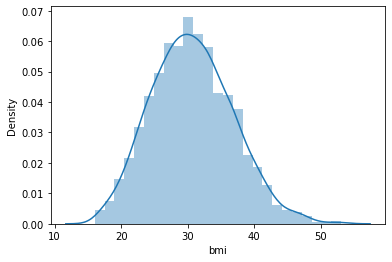

In [35]:
sns.distplot(df['bmi'])
plt.show()

##### from this plot it is clear that bmi data is Normally distributed as it shows a bell curve.

In [36]:
print('skewness:',df['bmi'].skew())

skewness: 0.28446275054239506


##### As the skewness is positive it shows that data is fairly symmetrical

In [37]:
print('Kurtosis:',df['bmi'].kurt())

Kurtosis: -0.05558295611799169


##### Negative Kurtosis indicates that data is lightly tailed,

#### Age

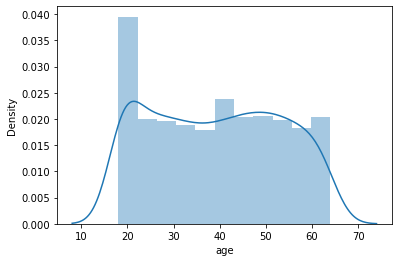

In [38]:
sns.distplot(df['age'])
plt.show()

In [39]:
print('skewness:',df['age'].skew())

skewness: 0.054780773126998195


In [40]:
print('Kurtosis:',df['age'].kurt())

Kurtosis: -1.244406407567826


### 5) Feature Engineering

Performing Feature Engineering to understand the different features in a dataset and their relationship with the target variable.Featurewiz and PCA is used which helps in determining important features and perform dimensionality reduction.

#### 5.1 Performing Label Encoding

In [79]:
from sklearn.preprocessing import LabelEncoder
df1 = df.copy()
for c in categorical_features:
    label = LabelEncoder()
    label.fit(list(df[c].values))
    df1[c] = label.transform(list(df1[c].values))

In [80]:
df1.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


In [81]:
x = df1.drop("expenses", axis = 1)
y = df1["expenses"]

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#### 5.2 Checking whether the dataset is balanced or Imbalanced

In [33]:
for i in categorical_features:
    print(i,df[i].value_counts())

sex sex
male      675
female    662
Name: count, dtype: int64
smoker smoker
no     1063
yes     274
Name: count, dtype: int64
region region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


#### from the above counts I can observe that smoker feature has imbalanced dataset